In [1]:
# Import the Libaraies
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt


In [2]:
!pip install tweepy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install snscrape

Defaulting to user installation because normal site-packages is not writeable


# Tweet Analysis with Link of twitter account

In [6]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "(from:elonmusk) until:2023-03-31 since:2022-01-01"
tweets = []
limit = 5000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user. username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)
        

C:\Users\user\AppData\Local\Temp\ipykernel_9116\178922417.py:13: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user. username, tweet.content])


                          Date      User  \
0    2023-03-30 23:59:08+00:00  elonmusk   
1    2023-03-30 22:02:28+00:00  elonmusk   
2    2023-03-30 07:44:08+00:00  elonmusk   
3    2023-03-30 07:15:48+00:00  elonmusk   
4    2023-03-30 07:13:10+00:00  elonmusk   
...                        ...       ...   
4995 2022-07-19 15:59:19+00:00  elonmusk   
4996 2022-07-19 15:55:22+00:00  elonmusk   
4997 2022-07-19 07:00:38+00:00  elonmusk   
4998 2022-07-19 05:32:27+00:00  elonmusk   
4999 2022-07-19 02:40:08+00:00  elonmusk   

                                                  Tweet  
0                                            @mtaibbi 🤣  
1                                        @iamharaldur !  
2                           @Galaxygamerone Coming soon  
3                    @Tesmanian_com It will per vehicle  
4                                   @TPostMillennial !!  
...                                                 ...  
4995  To think that Fremont was just a derelict buil...  
4996  C

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    5000 non-null   datetime64[ns, UTC]
 1   User    5000 non-null   object             
 2   Tweet   5000 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 117.3+ KB


In [8]:
df.columns

Index(['Date', 'User', 'Tweet'], dtype='object')

In [9]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt

In [10]:
# remove Pattern (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'],"@[\w]*")
df.head(20)

,Date,User,Tweet,clean_tweet
0,2023-03-30 23:59:08+00:00,elonmusk,@mtaibbi 🤣,🤣
1,2023-03-30 22:02:28+00:00,elonmusk,@iamharaldur !,!
2,2023-03-30 07:44:08+00:00,elonmusk,@Galaxygamerone Coming soon,Coming soon
3,2023-03-30 07:15:48+00:00,elonmusk,@Tesmanian_com It will per vehicle,It will per vehicle
4,2023-03-30 07:13:10+00:00,elonmusk,@TPostMillennial !!,!!
5,2023-03-30 06:37:44+00:00,elonmusk,Old joke about agnostic technologists building...,Old joke about agnostic technologists building...
6,2023-03-29 23:18:40+00:00,elonmusk,@BillyM2k Makes me sad,Makes me sad
7,2023-03-29 22:53:09+00:00,elonmusk,@GRDecter Combined with excess government spen...,"Combined with excess government spending, whi..."
8,2023-03-29 22:51:48+00:00,elonmusk,@GRDecter Serious issue. US policy has been to...,Serious issue. US policy has been too heavy-h...
9,2023-03-29 22:41:45+00:00,elonmusk,@boringcompany Making progress!,Making progress!


In [11]:
# Remove special Characterstic number and punctuation
df['clean_tweet'] = df['Tweet'].str.replace("[^a-zA-Z#]"," ")
df.head(20)

C:\Users\user\AppData\Local\Temp\ipykernel_9116\2840319962.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace("[^a-zA-Z#]"," ")


,Date,User,Tweet,clean_tweet
0,2023-03-30 23:59:08+00:00,elonmusk,@mtaibbi 🤣,mtaibbi
1,2023-03-30 22:02:28+00:00,elonmusk,@iamharaldur !,iamharaldur
2,2023-03-30 07:44:08+00:00,elonmusk,@Galaxygamerone Coming soon,Galaxygamerone Coming soon
3,2023-03-30 07:15:48+00:00,elonmusk,@Tesmanian_com It will per vehicle,Tesmanian com It will per vehicle
4,2023-03-30 07:13:10+00:00,elonmusk,@TPostMillennial !!,TPostMillennial
5,2023-03-30 06:37:44+00:00,elonmusk,Old joke about agnostic technologists building...,Old joke about agnostic technologists building...
6,2023-03-29 23:18:40+00:00,elonmusk,@BillyM2k Makes me sad,BillyM k Makes me sad
7,2023-03-29 22:53:09+00:00,elonmusk,@GRDecter Combined with excess government spen...,GRDecter Combined with excess government spen...
8,2023-03-29 22:51:48+00:00,elonmusk,@GRDecter Serious issue. US policy has been to...,GRDecter Serious issue US policy has been to...
9,2023-03-29 22:41:45+00:00,elonmusk,@boringcompany Making progress!,boringcompany Making progress


In [12]:
# Remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(20)

,Date,User,Tweet,clean_tweet
0,2023-03-30 23:59:08+00:00,elonmusk,@mtaibbi 🤣,mtaibbi
1,2023-03-30 22:02:28+00:00,elonmusk,@iamharaldur !,iamharaldur
2,2023-03-30 07:44:08+00:00,elonmusk,@Galaxygamerone Coming soon,Galaxygamerone Coming soon
3,2023-03-30 07:15:48+00:00,elonmusk,@Tesmanian_com It will per vehicle,Tesmanian will vehicle
4,2023-03-30 07:13:10+00:00,elonmusk,@TPostMillennial !!,TPostMillennial
5,2023-03-30 06:37:44+00:00,elonmusk,Old joke about agnostic technologists building...,joke about agnostic technologists building art...
6,2023-03-29 23:18:40+00:00,elonmusk,@BillyM2k Makes me sad,BillyM Makes
7,2023-03-29 22:53:09+00:00,elonmusk,@GRDecter Combined with excess government spen...,GRDecter Combined with excess government spend...
8,2023-03-29 22:51:48+00:00,elonmusk,@GRDecter Serious issue. US policy has been to...,GRDecter Serious issue policy been heavy hande...
9,2023-03-29 22:41:45+00:00,elonmusk,@boringcompany Making progress!,boringcompany Making progress


In [13]:
# Individual words considered as tokens

tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(20)

0                                             [mtaibbi]
1                                         [iamharaldur]
2                        [Galaxygamerone, Coming, soon]
3                            [Tesmanian, will, vehicle]
4                                     [TPostMillennial]
5     [joke, about, agnostic, technologists, buildin...
6                                       [BillyM, Makes]
7     [GRDecter, Combined, with, excess, government,...
8     [GRDecter, Serious, issue, policy, been, heavy...
9                     [boringcompany, Making, progress]
10                                              [andst]
11                                     [EvaFoxU, years]
12       [iheartmindy, This, deserves, close, scrutiny]
13    [BillyM, optimizing, greatest, understanding, ...
14                                        [Jason, Yeah]
15    [TwitterSafety, Given, that, there, million, t...
16    [TheChiefNerd, Leading, developers, will, heed...
17    [TeslaDiva, Tesla, temp, automatically, ke

In [14]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head(20)

0                                             [mtaibbi]
1                                         [iamharaldur]
2                           [galaxygameron, come, soon]
3                             [tesmanian, will, vehicl]
4                                       [tpostmillenni]
5     [joke, about, agnost, technologist, build, art...
6                                        [billym, make]
7     [grdecter, combin, with, excess, govern, spend...
8     [grdecter, seriou, issu, polici, been, heavi, ...
9                       [boringcompani, make, progress]
10                                              [andst]
11                                      [evafoxu, year]
12          [iheartmindi, thi, deserv, close, scrutini]
13    [billym, optim, greatest, understand, univers,...
14                                        [jason, yeah]
15    [twittersafeti, given, that, there, million, t...
16    [thechiefnerd, lead, develop, will, heed, thi,...
17    [tesladiva, tesla, temp, automat, kept, wi

In [15]:
# combine into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,Date,User,Tweet,clean_tweet
0,2023-03-30 23:59:08+00:00,elonmusk,@mtaibbi 🤣,mtaibbi
1,2023-03-30 22:02:28+00:00,elonmusk,@iamharaldur !,iamharaldur
2,2023-03-30 07:44:08+00:00,elonmusk,@Galaxygamerone Coming soon,galaxygameron come soon
3,2023-03-30 07:15:48+00:00,elonmusk,@Tesmanian_com It will per vehicle,tesmanian will vehicl
4,2023-03-30 07:13:10+00:00,elonmusk,@TPostMillennial !!,tpostmillenni


In [16]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


# Exploratory Data Analysis

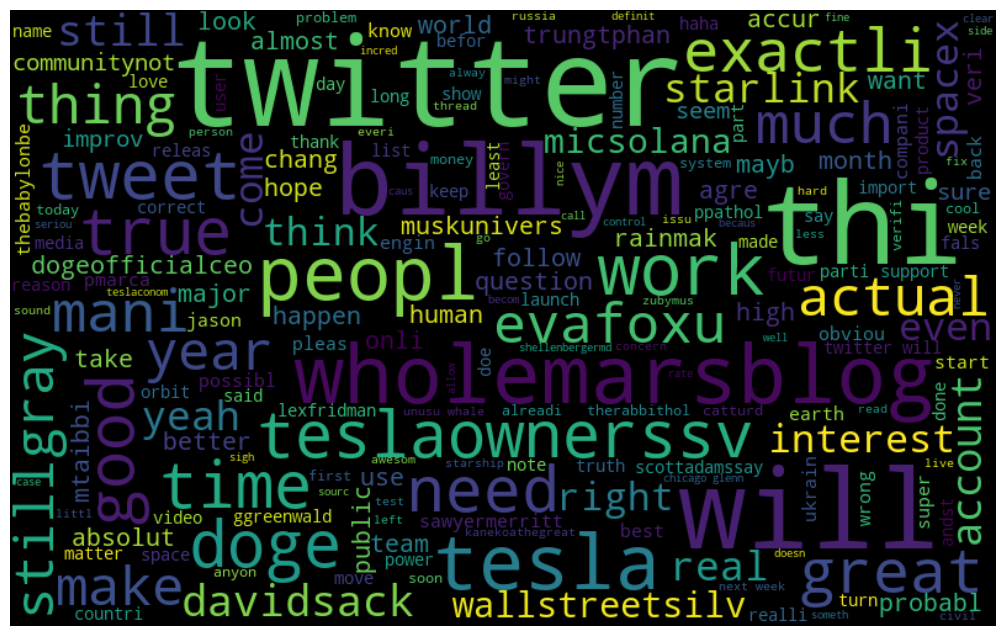

In [17]:
# Visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Frequent words visualization Positive
all_words = " ".join([sentence for sentence, label in zip(df['clean_tweet'], df['label']) if label == 0])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'label'

In [20]:
df.columns

Index(['Date', 'User', 'Tweet', 'clean_tweet'], dtype='object')

In [21]:
# Example code for adding the 'label' column
df['label'] = [1 if sentiment == 'positive' else 0 for sentiment in df['Tweet']]
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: label, Length: 5000, dtype: int64

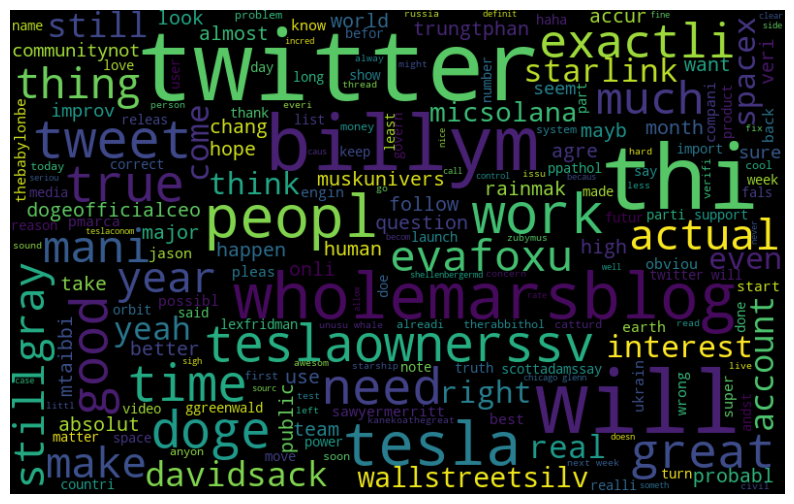

In [22]:
# Frequent words visualization Positive
all_words = " ".join([sentence for sentence, label in zip(df['clean_tweet'], df['label']) if label == 0])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Extract the hashtag
def hashtag_extract(tweet):
    hashtags = []
    # Loop words in tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [24]:
def hashtag_extract(tweet):
    hashtags = []
    # Loop words in tweet
    for word in tweet.split():
        ht = re.findall(r"#(\w+)", word)
        hashtags.extend(ht)
    return hashtags


In [25]:
# extract hashings from non-racist/ sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])
ht_positive

AttributeError: 'Series' object has no attribute 'split'

In [26]:
def hashtag_extract(tweets):
    hashtags = []
    # Loop over tweets
    for tweet in tweets:
        # Loop over words in tweet
        for word in tweet.split():
            ht = re.findall(r"#(\w+)", word)
            hashtags.extend(ht)
    return hashtags
print(hashtag_extract)

<function hashtag_extract at 0x00000236476C6DC0>


In [27]:
# extract hashtags from non-racist/ sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0].tolist())
ht_positive

['sobrav', 'freespeech']

In [28]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [29]:
df.columns

Index(['Date', 'User', 'Tweet', 'clean_tweet', 'label'], dtype='object')